In [1]:
#imports 
import pandas as pd 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bokchoe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('cleaned_articles_mass.csv')
df.head()

,position_section,position_subsection,hl1,hl2,author,lede,body,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned
0,BUSINESS,unknown,cerezyme alternative gets fda approval,unknown,Associated Press,washington - the food and drug administration ...,washington - the food and drug administration ...,2010-02-27,"{'subject': [{'score': '91', 'classCode': 'ST0...",2010,91,washington food drug administration approved n...
1,G,Living Arts,unknown,unknown,AMI ALBERNAZ,earth-friendly sale porter square eco-boutique...,shoes with moxie moxie is taking 20 percent of...,2010-04-22,"{'subject': [{'score': '90', 'classCode': 'ST0...",2010,381,shoes moxie moxie taking 20 percent sexy ' hee...
2,NEWS,Metro,unknown,unknown,unknown,"boston 96 orlando 84 celtics win series, 4-2","boston 96 orlando 84 celtics win series, 4-2",2010-05-29,"{'organization': [{'score': '84', 'className':...",2010,8,"boston 96 orlando 84 celtics win series , 4-"
3,NEWS,Metro,"leave car home for first night, city urges",unknown,unknown,the mayor of boston and the city's top brass h...,``first night is so memorable and fun; what's ...,2010-12-29,"{'subject': [{'score': '90', 'classCode': 'STX...",2010,343,first night memorable fun ; ' fun getting park...
4,NEWS,Metro,a flawed calculus,unknown,Kevin Cullen,"when it comes to amy bishop, the harvard-train...","in 1993, amy bishop and her husband, james and...",2010-02-16,"{'subject': [{'score': '90', 'classCode': 'STX...",2010,555,"1993 , amy bishop husband , james anderson , q..."


In [3]:
# using VADER model to get the sentiment score 
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    if pd.isna(text):
        return "unknown"
    else:
        return sia.polarity_scores(text)['compound']


In [4]:
# getting the sentiment score of 
df['hl1_sentiment'] = df['hl1'].apply(get_sentiment_score)
df['hl2_sentiment'] = df['hl2'].apply(get_sentiment_score)
df['body_sentiment'] = df['body_cleaned'].apply(get_sentiment_score)

In [5]:
df.head(5)

,position_section,position_subsection,hl1,hl2,author,lede,body,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,hl1_sentiment,hl2_sentiment,body_sentiment
0,BUSINESS,unknown,cerezyme alternative gets fda approval,unknown,Associated Press,washington - the food and drug administration ...,washington - the food and drug administration ...,2010-02-27,"{'subject': [{'score': '91', 'classCode': 'ST0...",2010,91,washington food drug administration approved n...,0.4767,0.0,0.0772
1,G,Living Arts,unknown,unknown,AMI ALBERNAZ,earth-friendly sale porter square eco-boutique...,shoes with moxie moxie is taking 20 percent of...,2010-04-22,"{'subject': [{'score': '90', 'classCode': 'ST0...",2010,381,shoes moxie moxie taking 20 percent sexy ' hee...,0.0000,0.0,0.9887
2,NEWS,Metro,unknown,unknown,unknown,"boston 96 orlando 84 celtics win series, 4-2","boston 96 orlando 84 celtics win series, 4-2",2010-05-29,"{'organization': [{'score': '84', 'className':...",2010,8,"boston 96 orlando 84 celtics win series , 4-",0.0000,0.0,0.5859
3,NEWS,Metro,"leave car home for first night, city urges",unknown,unknown,the mayor of boston and the city's top brass h...,``first night is so memorable and fun; what's ...,2010-12-29,"{'subject': [{'score': '90', 'classCode': 'STX...",2010,343,first night memorable fun ; ' fun getting park...,-0.0516,0.0,0.9442
4,NEWS,Metro,a flawed calculus,unknown,Kevin Cullen,"when it comes to amy bishop, the harvard-train...","in 1993, amy bishop and her husband, james and...",2010-02-16,"{'subject': [{'score': '90', 'classCode': 'STX...",2010,555,"1993 , amy bishop husband , james anderson , q...",0.0000,0.0,-0.9972


In [6]:
num_null_values = df['body_cleaned'].isnull().sum()
print("Number of rows with null values in the 'body_clean' column:", num_null_values)

Number of rows with null values in the 'body_clean' column: 3


In [7]:
unique_values = df['position_section'].unique()
print("Unique values of the position_section:", unique_values)

Unique values of the position_section: ['BUSINESS' 'G' 'NEWS' 'EDITORIAL OPINION' 'REGIONAL' 'SPORTS'
 'LIVING ARTS' 'MAGAZINE' 'unknown' 'SUNDAY' 'DIVERSITY' 'TAB2'
 'REALESTATE' 'PROJECT' 'TABM' 'ADVSUP']


In [8]:
unique_values = df['position_subsection'].unique()
print("Unique values of the position_subsection:", unique_values)

Unique values of the position_subsection: ['unknown' 'Living Arts' 'Metro' 'Opinion' 'North' 'Books' 'School'
 'South' 'West' 'Letters' 'Food' 'Editorial' 'Ideas' 'Travel' 'G'
 'Preview' 'Olympics' 'Special' 'Scores' 'College' 'Marathon' 'Business'
 'HealthScience' 'Globe100' 'AdvSup' 'Antiques' 'BostonWorks' 'Autos'
 'RealEstate' 'Super' 'Diversity' 'TopPlaces' 'BusinessSpecial']


Visualization

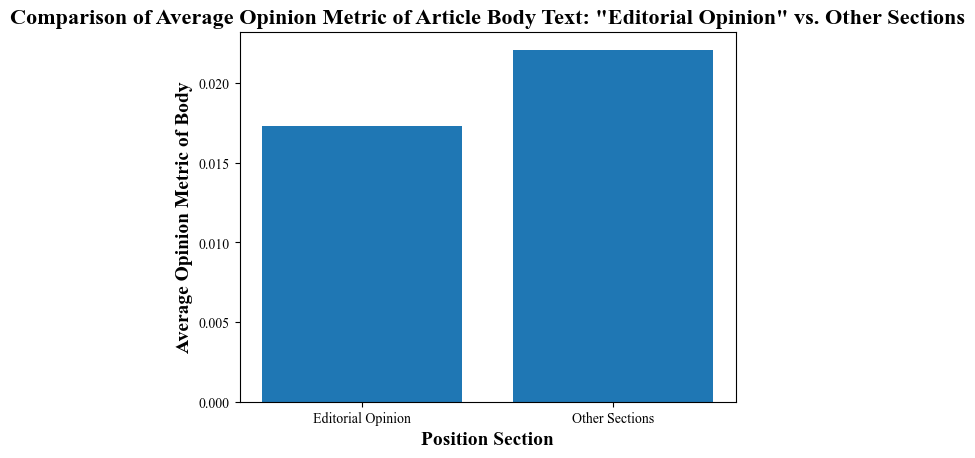

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'body_sentiment' column to numeric data type, ignoring errors
df['body_sentiment'] = pd.to_numeric(df['body_sentiment'], errors='coerce')
colors = ['#3fd0d8', '#f6cb02']

# Filter rows with 'EDITORIAL OPINION' in 'position_section' column
editorial_opinion = df[df['position_section'] == 'EDITORIAL OPINION']
other_sections = df[df['position_section'] != 'EDITORIAL OPINION']

# Calculate mean body sentiment for 'EDITORIAL OPINION' and other sections
mean_sentiment_editorial = editorial_opinion['body_sentiment'].mean()
mean_sentiment_other = other_sections['body_sentiment'].mean()

# Plotting the comparison
plt.bar(['Editorial Opinion', 'Other Sections'], [mean_sentiment_editorial, mean_sentiment_other])
plt.xlabel('Position Section', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel('Average Opinion Metric of Body', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.title('Comparison of Average Opinion Metric of Article Body Text: "Editorial Opinion" vs. Other Sections', fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.savefig('sentiment_edop_vs_other_sections.png', transparent= True)
plt.show()

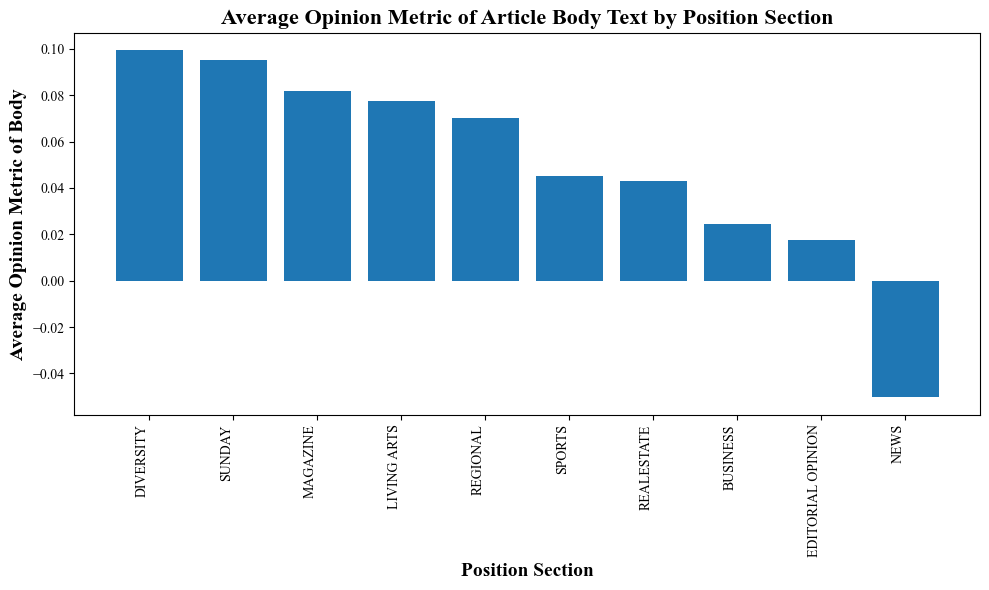

In [52]:
mean_sentiment_by_section = df.groupby('position_section')['body_sentiment'].mean().reset_index()
# Replace 'G' with 'LIVING ARTS' in the 'position_section' column
mean_sentiment_by_section['position_section'] = mean_sentiment_by_section['position_section'].replace('G', 'LIVING ARTS')

# Drop specified values from the 'position_section' column
mean_sentiment_by_section = mean_sentiment_by_section[~mean_sentiment_by_section['position_section'].isin(['TAB2', 'unknown', 'TABM','PROJECT','ADVSUP'])]

# Sort the DataFrame by mean body sentiment
mean_sentiment_by_section = mean_sentiment_by_section.sort_values(by='body_sentiment', ascending=False)

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(mean_sentiment_by_section['position_section'], mean_sentiment_by_section['body_sentiment'])
plt.xlabel('Position Section', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel('Average Opinion Metric of Body', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.title('Average Opinion Metric of Article Body Text by Position Section', fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(rotation=90, ha='right', fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()

# Save the plot as an image
plt.savefig('mean_body_sentiment_by_position_section.png', transparent =True)

# Display the plot
plt.show()